### __Load Data__

In [1]:
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

### __Feature Engineering__

In [2]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

In [13]:
merged_pes.columns

Index(['Solar_MWh_credit', 'Wind_MWh_credit', 'capacity_mwp', 'cloud_cover',
       'cloud_cover_diff', 'cloud_cover_max_1h', 'cloud_cover_max_3h',
       'cloud_cover_max_6h', 'cloud_cover_mean_1h', 'cloud_cover_mean_3h',
       'cloud_cover_mean_6h', 'cloud_cover_min_1h', 'cloud_cover_min_3h',
       'cloud_cover_min_6h', 'cloud_cover_next_forecast', 'cloud_cover_std_1h',
       'cloud_cover_std_3h', 'cloud_cover_std_6h', 'cos_day', 'cos_hour',
       'cos_month', 'installed_capacity_mwp',
       'interaction_solar_down_rad_temp', 'sin_day', 'sin_hour', 'sin_month',
       'solar_down_rad', 'solar_down_rad_diff', 'solar_down_rad_max_1h',
       'solar_down_rad_max_3h', 'solar_down_rad_max_6h',
       'solar_down_rad_mean_1h', 'solar_down_rad_mean_3h',
       'solar_down_rad_mean_6h', 'solar_down_rad_min_1h',
       'solar_down_rad_min_3h', 'solar_down_rad_min_6h',
       'solar_down_rad_next_forecast', 'solar_down_rad_range_3h',
       'solar_down_rad_std_1h', 'solar_down_rad_std_3h'

### __Baseline wind energy forecast__

In [3]:
import model_utils
import numpy as np
import importlib
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_wind"

qr_model_wind = model_utils.QuantileRegressorModel(feature_engineerer_wind_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_wind.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from qr_model_wind\qr_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from qr_model_wind\qr_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from qr_model_wind\qr_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from qr_model_wind\qr_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from qr_model_wind\qr_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from qr_model_wind\qr_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from qr_model_wind\qr_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from qr_model_wind\qr_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from qr_model_wind\qr_model_quantile_0.9.pkl
Using the loaded pretrained Quantile Regressor model fo

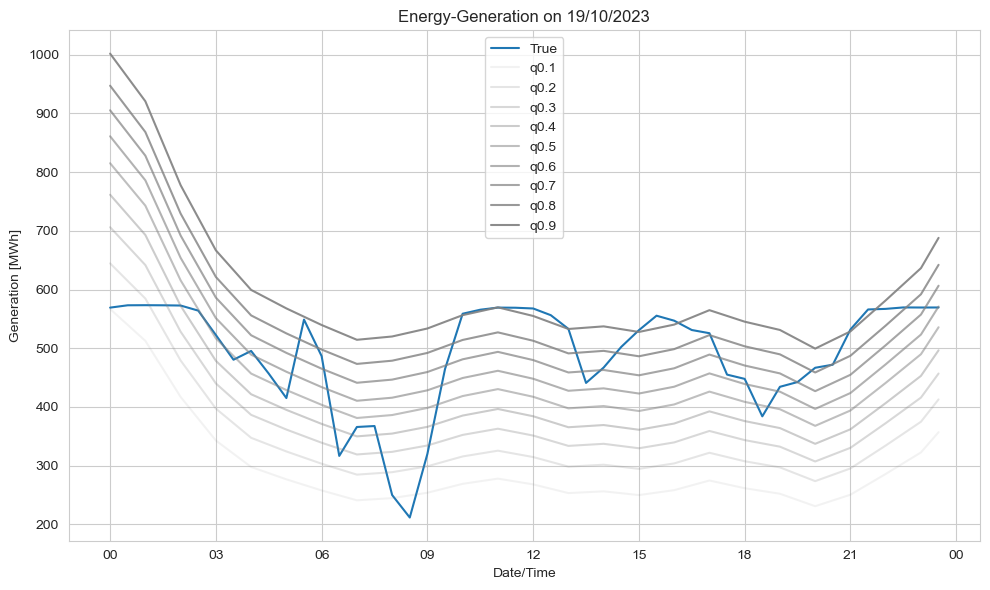

In [4]:
qr_model_wind.plot_quantils(feature_engineerer_wind_baseline.y_test.index, qr_model_wind.q_predictions, quantiles=quantiles, year=2023, month=10, day=19)

### __Baseline solar energy forecast__

In [5]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_solar"

qr_model_solar = model_utils.QuantileRegressorModel(feature_engineerer_solar_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_solar.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from qr_model_solar\qr_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from qr_model_solar\qr_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from qr_model_solar\qr_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from qr_model_solar\qr_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from qr_model_solar\qr_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from qr_model_solar\qr_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from qr_model_solar\qr_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from qr_model_solar\qr_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from qr_model_solar\qr_model_quantile_0.9.pkl
Using the loaded pretrained Quantile Regressor

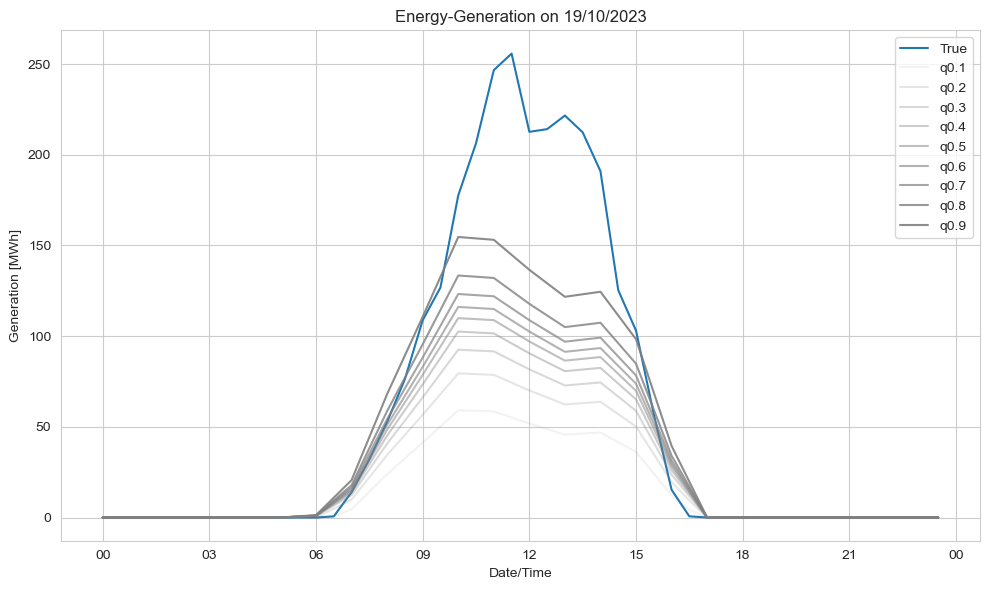

In [6]:
qr_model_solar.plot_quantils(daterange=feature_engineerer_solar_baseline.y_test.index, y=qr_model_solar.q_predictions, quantiles=quantiles, year=2023, month=10, day=19)

### __LightGBM wind energy forecast__

In [7]:
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_wind\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_wind\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_wind\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_wind\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_wind\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_wind\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_wind\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_wind\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_wind\lgbm_model_quantile_0.9.pkl
Using the loaded pr

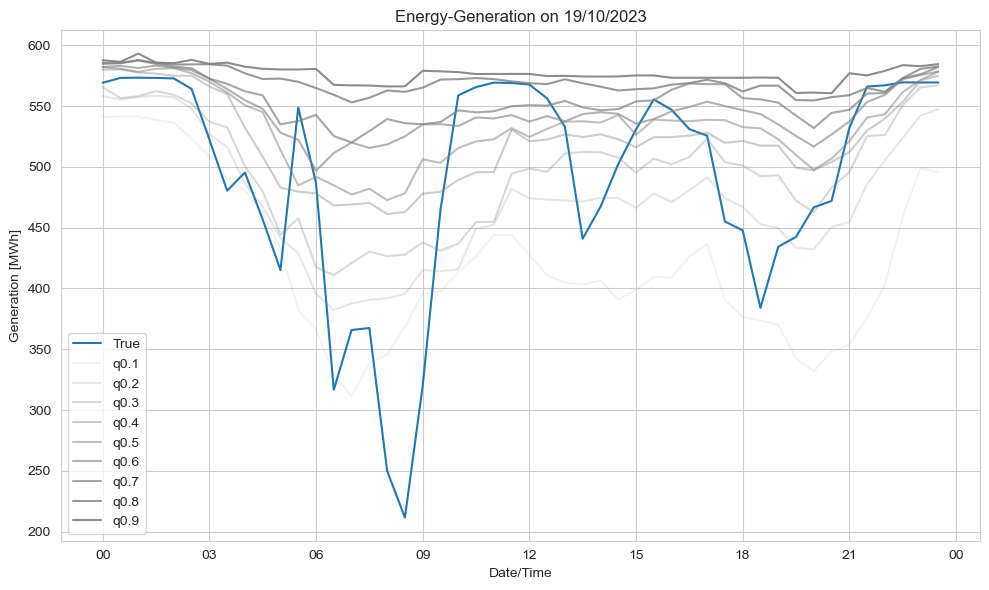

In [8]:
lgbm_model_wind.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind.q_predictions, quantiles, month=10, day=19)

### __LightGBM solar energy forecast__

In [9]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar"

lgbm_model_solar = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_solar\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_solar\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_solar\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_solar\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_solar\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_solar\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_solar\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_solar\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_solar\lgbm_model_quantile_0.9.pkl
Using the 

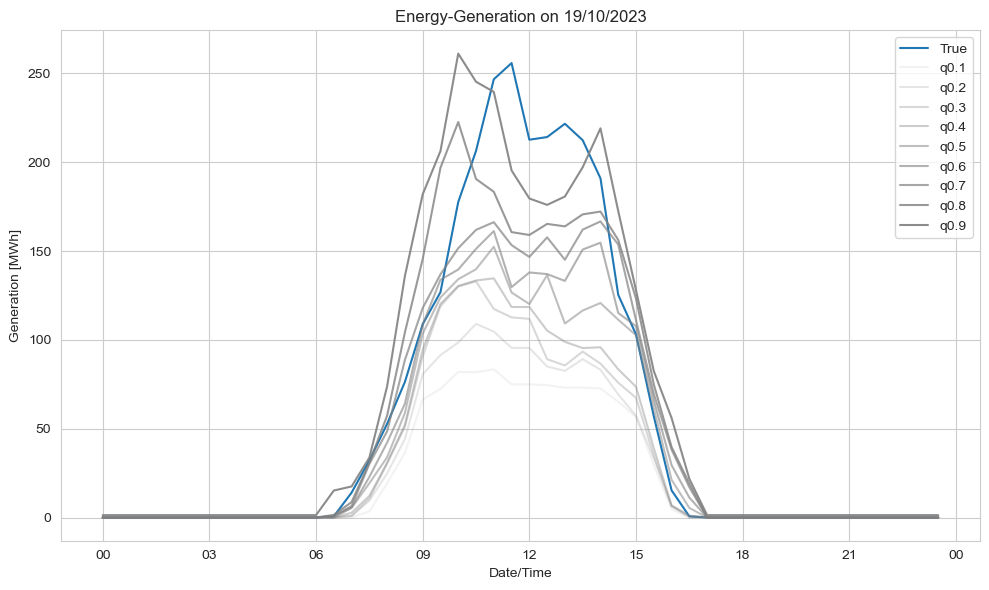

In [10]:
lgbm_model_solar.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar.q_predictions, quantiles, year=2023, month=10, day=19)

### __Vergleich der Pinball Scores der Modelle__

In [11]:
performance_scores = {'Solarenergie' : [qr_model_solar.pinball_score(), lgbm_model_solar.pinball_score()],
                      'Windenergie' : [qr_model_wind.pinball_score(), lgbm_model_wind.pinball_score()]
                      }
performance_df = pd.DataFrame(performance_scores, index=["baseline", "LightGBM"])
performance_df

Solarenergie  Windenergie
baseline     11.914653    31.795997
LightGBM      8.938359    21.476032

### __Modell Training all in one Modell__

In [12]:
import model_utils
import pandas as pd
import importlib
importlib.reload(model_utils)

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

columns_to_add = list()

for col in merged_hornsea.columns:
    if col not in merged_pes.columns:
        columns_to_add.append(col)

merged_all = merged_pes.merge(merged_hornsea[columns_to_add], left_index = True, right_index = True)
merged_all["energy"] = merged_all["Solar_MWh_credit"] + merged_all["Wind_MWh_credit"]
merged_all.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1, inplace = True)

from Preprocessing import *
feature_engineerer_all = FeatureEngineerer(labels_to_remove=  ["energy"], columns_to_ohe = ['unavailabilityType', 'affectedUnit'], label = ["energy"])
feature_engineerer_all.perform_feature_engineering(merged_all, deployment = False, labels_to_remove=  ["energy"])

import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_model_all"

lgbm_model = model_utils.LGBMRegressorModel(feature_engineerer_all, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_all\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_all\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_all\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_all\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_all\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_all\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_all\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_all\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_all\lgbm_model_quantile_0.9.pkl
Using the loaded pretrained 

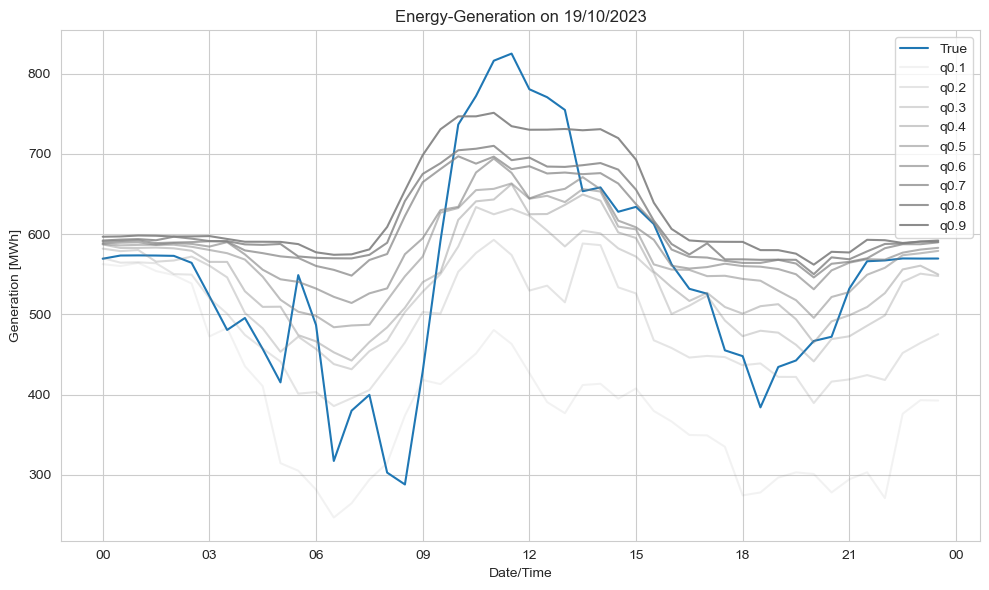

In [13]:
lgbm_model.plot_quantils(feature_engineerer_all.y_test.index, lgbm_model.q_predictions, quantiles, year=2023, month=10, day=19)

### __Combine Solar and Wind Modell for comparison__

In [14]:
solar_energy = lgbm_model_solar.q_predictions
wind_energy = lgbm_model_wind.q_predictions

combined_energy = {key: solar_energy[key] + wind_energy[key] for key in solar_energy}

model_utils.pinball_score(combined_energy, quantiles)

26.09143426874892

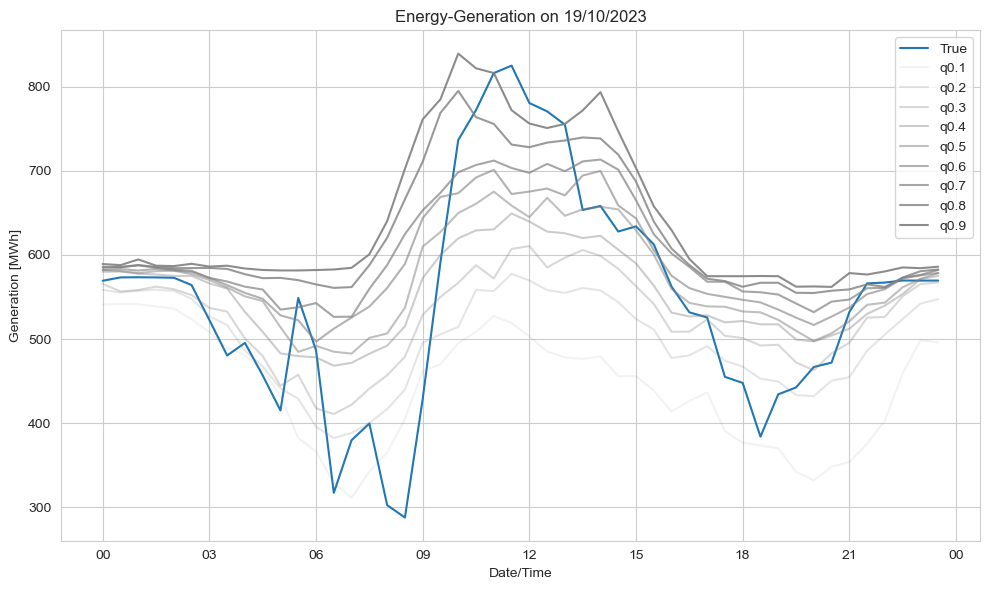

In [15]:
lgbm_model.plot_quantils(feature_engineerer_all.y_test.index, combined_energy, quantiles, year=2023, month=10, day=19)

In [16]:
performance_scores = {'Gesamt_Modell' : [lgbm_model.pinball_score()],
                      'Kombiniertes_Modell' : [model_utils.pinball_score(combined_energy, quantiles)]
                      }
performance_df = pd.DataFrame(performance_scores, index=["total_energy_without_HT"])
performance_df

Gesamt_Modell  Kombiniertes_Modell
total_energy_without_HT      26.247761            26.091434

### __Use Hyperparametertuning for LightGBM__

__Wind__

In [17]:
importlib.reload(model_utils)
from scipy.stats import randint, uniform

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind_hyperparameter"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=100, high=800),
    learning_rate=uniform()
)

lgbm_model_wind_hyperparameter = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_wind_hyperparameter.train_and_predict_hyperparametertuning(params_distributions, search="RandomSearch")  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind_hyperparameter.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.8.pkl
Loaded p

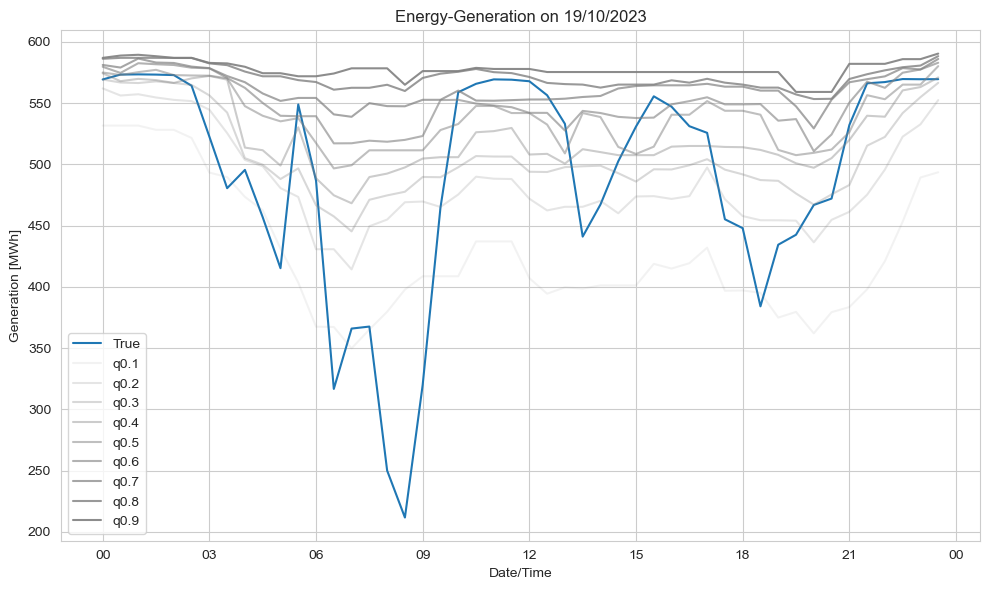

In [18]:
lgbm_model_wind_hyperparameter.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind_hyperparameter.q_predictions, quantiles, year=2023, month=10, day=19)

__solar__

In [19]:
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar_hyperparameter"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=100, high=800),
    learning_rate=uniform()
)

lgbm_model_solar_hyperparameter = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_solar_hyperparameter.train_and_predict_hyperparametertuning(params_distributions, search="RandomSearch")  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar_hyperparameter.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.8.pkl


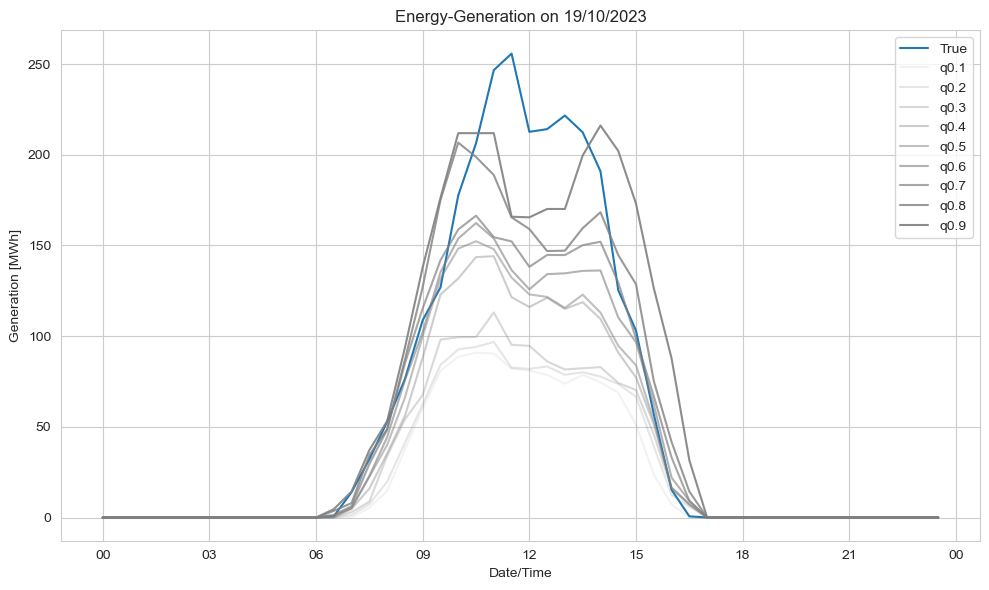

In [20]:
lgbm_model_solar_hyperparameter.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar_hyperparameter.q_predictions, quantiles, year=2023, month=10, day=19)

In [21]:
performance_scores = {'Solarenergie' : [qr_model_solar.pinball_score(), lgbm_model_solar.pinball_score(), lgbm_model_solar_hyperparameter.pinball_score()],
                      'Windenergie' : [qr_model_wind.pinball_score(), lgbm_model_wind.pinball_score(), lgbm_model_wind_hyperparameter.pinball_score()]
                      }
performance_df = pd.DataFrame(performance_scores, index=["baseline", "LightGBM", "LightGBM_Hyperparametertuning"])
performance_df

Solarenergie  Windenergie
baseline                          11.914653    31.795997
LightGBM                           8.938359    21.476032
LightGBM_Hyperparametertuning      9.082620    21.346469

### __conformalized quantile regression__

In [22]:
import Preprocessing
import importlib
importlib.reload(Preprocessing)

feature_engineerer_wind_cqr = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind_cqr.perform_feature_engineering(merged_hornsea, deployment = False, val_year=False)

importlib.reload(model_utils)
warnings.simplefilter("ignore", UserWarning)

quantiles = np.arange(0.1, 0.5, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "conformal_quantile_prediction_wind"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=50, high=100),
    learning_rate=uniform()
)

conformal_quantile_prediction_wind = model_utils.ConformalQuantilePredictionLGBM(feature_engineerer_wind_cqr, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
conformal_quantile_prediction_wind.train_and_predict(params_distributions)  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {conformal_quantile_prediction_wind.pinball_score()}")

Saved Point Prediction model (50%-Quantile) to conformal_quantile_prediction_wind\point_prediction_lgbm.pkl
Saved Quantile Regressor model for quantile 0.1 and 0.9 to conformal_quantile_prediction_wind\conformal_quantile_prediction_lgbm0.1.pkl
Saved Quantile Regressor model for quantile 0.2 and 0.8 to conformal_quantile_prediction_wind\conformal_quantile_prediction_lgbm0.2.pkl
Saved Quantile Regressor model for quantile 0.3 and 0.7 to conformal_quantile_prediction_wind\conformal_quantile_prediction_lgbm0.3.pkl
Saved Quantile Regressor model for quantile 0.4 and 0.6 to conformal_quantile_prediction_wind\conformal_quantile_prediction_lgbm0.4.pkl
Quantile Regressor Pinball Score: 24.17327598965153


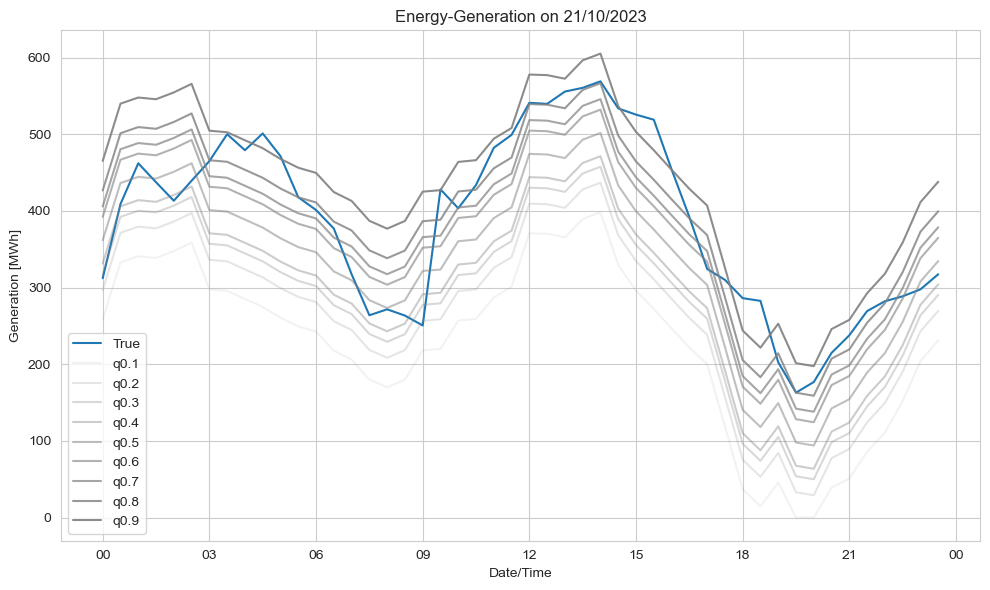

In [23]:
quantiles = np.arange(0.1, 1, 0.1)
quantiles = np.round(quantiles, 1)
conformal_quantile_prediction_wind.plot_quantils(feature_engineerer_wind_cqr.y_test.index, conformal_quantile_prediction_wind.q_predictions, quantiles, year=2023, month=10, day=21)

In [24]:
import Preprocessing
import importlib
importlib.reload(Preprocessing)

feature_engineerer_solar_cqr = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_cqr.perform_feature_engineering(merged_pes, deployment = False, val_year=False)

importlib.reload(model_utils)
warnings.simplefilter("ignore", UserWarning)

quantiles = np.arange(0.1, 0.5, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "conformal_quantile_prediction_solar"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=50, high=100),
    learning_rate=uniform()
)

conformal_quantile_prediction_solar = model_utils.ConformalQuantilePredictionLGBM(feature_engineerer_solar_cqr, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
conformal_quantile_prediction_solar.train_and_predict(params_distributions)  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {conformal_quantile_prediction_solar.pinball_score()}")

Loaded pretrained Point Prediction model (50%-Quantile) from conformal_quantile_prediction_solar\point_prediction_lgbm.pkl
Loaded pretrained Quantile Regressor model for quantile 0.1 from conformal_quantile_prediction_solar\conformal_quantile_prediction_lgbm0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from conformal_quantile_prediction_solar\conformal_quantile_prediction_lgbm0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from conformal_quantile_prediction_solar\conformal_quantile_prediction_lgbm0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from conformal_quantile_prediction_solar\conformal_quantile_prediction_lgbm0.4.pkl
Using the loaded pretrained Point Prediction model (50%-Quantile).
Using the loaded pretrained Conformal Quantile Regressor model for quantile 0.1
Using the loaded pretrained Conformal Quantile Regressor model for quantile 0.2
Using the loaded pretrained Conformal Quantile Regressor model for quantile 0.

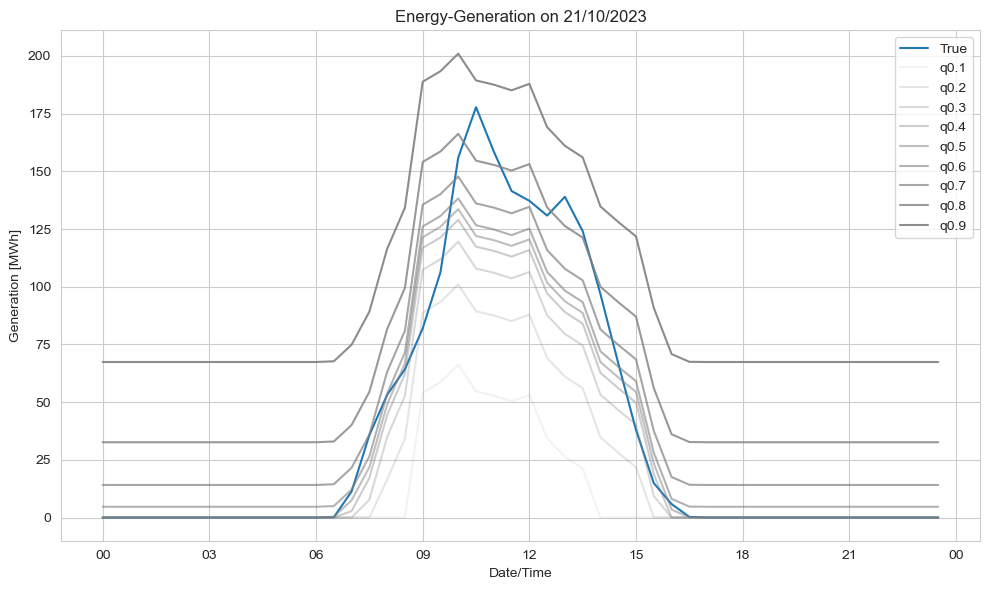

In [25]:
quantiles = np.arange(0.1, 1, 0.1)
quantiles = np.round(quantiles, 1)
conformal_quantile_prediction_solar.plot_quantils(feature_engineerer_solar_cqr.y_test.index, conformal_quantile_prediction_solar.q_predictions, quantiles, year=2023, month=10, day=21)

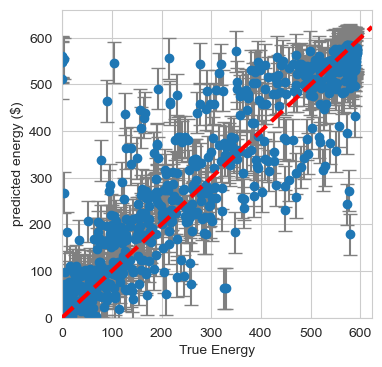

In [26]:
import matplotlib.pyplot as plt
predictions = pd.DataFrame(conformal_quantile_prediction_wind.q_predictions)
predictions = predictions.sample(frac=0.1, random_state=42)

fig, ax = plt.subplots(figsize=(4, 4))
alpha = 0.3
plt.errorbar(predictions["true"], predictions["0.5"], 
             yerr=(predictions["0.5"]-predictions[str(alpha)], predictions[str(np.round((1-alpha), 1))]-predictions["0.5"]),
             ecolor='grey', linestyle='', marker = "o", capsize=5)

ax.axline([0, 0], [1, 1], color = "red", linestyle='--', lw=3, zorder=3)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('True Energy')
plt.ylabel('predicted energy ($)')
plt.show()

In [27]:
import pickle

# Pickle-Datei im Binär-Lesemodus ('rb') öffnen
with open('all_scores.pickle', 'rb') as f:
    # Laden des gesamten Dictionaries aus der Pickle-Datei
    model_predictions_dict = pickle.load(f)

# Jetzt kannst du auf die Modelle und ihre Predictions zugreifen
# Beispiel: Alle Modelle und ihre zugehörigen Predictions anzeigen

In [28]:
model_predictions_dict["CNN_LSTM"]["true"] = model_predictions_dict["True"]
model_predictions_dict["LSTM"]["true"] = model_predictions_dict["True"]
model_predictions_dict["LGBM"]["true"] = model_predictions_dict["True"]


In [29]:
df_cnn_lstm = pd.DataFrame(model_predictions_dict["CNN_LSTM"])
df_cnn_lstm.columns = df_cnn_lstm.columns.astype(str)
df_lstm = pd.DataFrame(model_predictions_dict["LSTM"])
df_lstm.columns = df_lstm.columns.astype(str)
df_lgbm = pd.DataFrame(model_predictions_dict["LGBM"])
df_lgbm.columns = df_lgbm.columns.astype(str)
df_cqr = pd.DataFrame(conformal_quantile_prediction_wind.q_predictions)

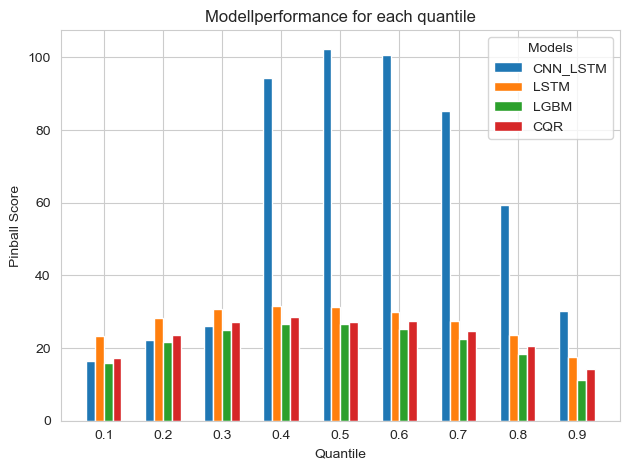

In [30]:
import model_utils
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

df_list = [df_cnn_lstm, df_lstm, df_lgbm, df_cqr]
names = ["CNN_LSTM", "LSTM", "LGBM", "CQR"]

model_utils.plot_quantile_performance(df_list, names, "Modellperformance for each quantile", quantiles, df_list=True)


### __Train Neural Networks__

__LSTM__

In [1]:
import ray

# Shut down Ray if it was running previously
ray.shutdown()

# Initialize Ray again
ray.init()

2024-10-22 15:11:29,616	INFO worker.py:1786 -- Started a local Ray instance.


RayContext(dashboard_url='', python_version='3.11.9', ray_version='2.37.0', ray_commit='1b620f244c4fb67d80661046091573fb6eefecb6')

In [7]:
import ray.train
import torch
import numpy as np
import pandas as pd
from functools import partial
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
import neural_networks
from ray import train

def tune_trainable(config, feature_engineerer, model_class, quantiles):
    trainer = neural_networks.Trainer(
        feature_engineerer=feature_engineerer,
        model_class=model_class,
        quantiles=quantiles,
        optimizer_class=torch.optim.Adam,
        dropout=config["dropout"],
        weight_decay=config["weight_decay"],
        lr=config["lr"],
        batch_size=config["batch_size"]
    )
    # trainer.fit(epochs=config['epochs'])

    trainer.train_and_test(epochs=config["epochs"])

    # After the training, get the pinball score
    pinball_score = model_utils.pinball_score(trainer.q_prediction_nn_df, quantiles=quantiles)
    
    # Report the pinball score to Ray Tune
    train.report({"pinball_score": pinball_score})  # Pass pinball_score as a dictionary

# Run Ray Tune
def custom_trial_dirname_creator(trial):
    # Only use the trial_id, which is short, to create the directory
    return f"trial_{trial.trial_id}"

# Update the tune.run command with the custom trial directory name creator
def run_ray_tune(feature_engineerer, model_class, quantiles):
    config = {
        "dropout": tune.uniform(0.25, 0.5),
        "weight_decay": tune.loguniform(1e-6, 1e-3),
        "lr": tune.loguniform(1e-4, 1e-1),
        "batch_size": tune.choice([16, 32, 48, 64]),
        "epochs": tune.choice([50, 75, 100, 150])
    }

    # Define an early stopping scheduler
    scheduler = ASHAScheduler(
        max_t=150,
        grace_period=10,
        reduction_factor=2
    )

    # Run the hyperparameter search
    analysis = tune.run(
        partial(tune_trainable, feature_engineerer=feature_engineerer, model_class=model_class, quantiles=quantiles),
        config=config,
        num_samples=15,
        scheduler=scheduler,
        trial_dirname_creator=custom_trial_dirname_creator,  # Use the custom directory name creator
        metric="pinball_score",  # Specify the metric to optimize
        mode="min",  # Specify that we want to minimize the pinball_score
    )

    print("Best hyperparameters found were: ", analysis.best_config)
    return analysis.best_config

# Example of calling Ray Tune
# Assuming `feature_engineerer`, `LSTM_model`, and `quantiles` are defined
best_hyperparamter = run_ray_tune(feature_engineerer_wind, neural_networks.LSTM_model, quantiles=np.arange(0.1, 1.0, 0.1).round(2))


2024-10-28 16:09:02,195	INFO worker.py:1786 -- Started a local Ray instance.
2024-10-28 16:09:05,239	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-10-28 16:09:05,241	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(raylet) Warning: The actor ImplicitFunc is very large (67 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(func pid=43084) 0. epoche startet: 
(func pid=42360) 1. epoche startet:  [repeated 27x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(func pid=43512) 1. epoche startet:  [repeated 17x across cluster]
(func pid=16572) 6. epoche startet:  [repeated 27x across cluster]
(func pid=43748) 6. epoche startet:  [repeated 24x across cluster]
(func pid=43228) Epoch 10: 956.0958251953125
(func pid=43228) 10. epoche startet:  [repeated 19x across cluster]
(func pid=16572) Epoch 10: 956.51220703125 [repeated 2x across cluster]
(func pid=43760) 9. epoche startet:  [repeated 24x across cluster]
(func 

(func pid=43064) Epoch 50: 243.61192321777344
(func pid=43064) pinball score 37.6793220110352
(func pid=49856) 40. epoche startet:  [repeated 18x across cluster]
(func pid=49848) Epoch 40: 230.23446655273438 [repeated 8x across cluster]
(func pid=43228) pinball score 37.13488282628529
(func pid=43760) 41. epoche startet:  [repeated 18x across cluster]
(func pid=43200) Epoch 40: 229.043701171875 [repeated 4x across cluster]
(func pid=43084) 43. epoche startet:  [repeated 19x across cluster]
(func pid=16572) 58. epoche startet:  [repeated 17x across cluster]
(func pid=16572) Epoch 60: 171.0525665283203
(func pid=43512) 16. epoche startet:  [repeated 22x across cluster]
(func pid=43676) 16. epoche startet:  [repeated 17x across cluster]
(func pid=49848) 49. epoche startet:  [repeated 19x across cluster]
(func pid=49856) Epoch 50: 242.49484252929688
(func pid=43084) pinball score 35.82921291506731
(func pid=49856) 51. epoche startet:  [repeated 17x across cluster]
(func pid=49852) Epoch 50

2024-10-28 16:19:01,760	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/Users/danie/ray_results/tune_trainable_2024-10-28_16-09-05' in 0.0120s.
2024-10-28 16:19:01,776	INFO tune.py:1041 -- Total run time: 596.53 seconds (596.02 seconds for the tuning loop).


(func pid=43512) pinball score 29.191230227661055
Best hyperparameters found were:  {'dropout': 0.26348388177977344, 'weight_decay': 0.00018830135274346997, 'lr': 0.0016437703970172465, 'batch_size': 48, 'epochs': 100}


In [8]:
importlib.reload(model_utils)
import neural_networks
importlib.reload(neural_networks)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir = "lstm_model_wind.pth"

lstm_wind = neural_networks.Trainer(feature_engineerer_wind,  
                                    neural_networks.LSTM_model,
                                    quantiles, 
                                    optimizer_class=torch.optim.Adam,
                                    lr = best_hyperparamter["lr"], 
                                    batch_size = best_hyperparamter["batch_size"],
                                    # in_shape=best_hyperparamter["in_shape"], 
                                    dropout=best_hyperparamter["dropout"],
                                    weight_decay=best_hyperparamter["weight_decay"],)
                                    # model_path=model_save_dir, 
                                    # load_pretrained=False)
lstm_wind.train_and_test(epochs=best_hyperparamter["epochs"])

0. epoche startet: 
1. epoche startet: 
2. epoche startet: 
3. epoche startet: 
4. epoche startet: 
5. epoche startet: 
6. epoche startet: 
7. epoche startet: 
8. epoche startet: 
9. epoche startet: 
Epoch 10: 875.9675903320312
10. epoche startet: 
11. epoche startet: 
12. epoche startet: 
13. epoche startet: 
14. epoche startet: 
15. epoche startet: 
16. epoche startet: 
17. epoche startet: 
18. epoche startet: 
19. epoche startet: 
Epoch 20: 580.5106811523438
20. epoche startet: 
21. epoche startet: 
22. epoche startet: 
23. epoche startet: 
24. epoche startet: 
25. epoche startet: 
26. epoche startet: 
27. epoche startet: 
28. epoche startet: 
29. epoche startet: 
Epoch 30: 374.8946533203125
30. epoche startet: 
31. epoche startet: 
32. epoche startet: 
33. epoche startet: 
34. epoche startet: 
35. epoche startet: 
36. epoche startet: 
37. epoche startet: 
38. epoche startet: 
39. epoche startet: 
Epoch 40: 229.91110229492188
40. epoche startet: 
41. epoche startet: 
42. epoche star

In [38]:
neural_networks.save_pytorch_model(lstm_wind.learner.model.state_dict, "LSTM_PyTorch_Wind")

In [43]:
lstm_wind.learner.model.state_dict

<bound method Module.state_dict of LSTM_model(
  (lstm1): LSTM(74, 20, num_layers=2, batch_first=True, dropout=0.3)
  (activation): ReLU()
  (final_layers): ModuleList(
    (0-8): 9 x Linear(in_features=20, out_features=1, bias=True)
  )
)>

In [39]:
g = neural_networks.load_pytorch_model(neural_networks.LSTM_model, "LSTM_PyTorch_wind", len_features = feature_engineerer_wind.X_train.shape[1])

In [40]:
g

<All keys matched successfully>

### __Mean Ensemble Modell__

### __Stacking Ensemble Modell__

In [90]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
q_prediction_ensemble = {}
q_prediction_ensemble["true"] = feature_engineerer_wind.y_test.values

for qu in quantiles:

    level0 = list()
    level0.append(("baseline", qr_model_wind.models[qu]))
    level0.append(("lgbm", lgbm_model_wind.models[qu]))
    # level0.append(("lstm", lstm_wind))
    level1 = Ridge()

    model = StackingRegressor(estimators=level0, final_estimator=level1)

    model.fit(feature_engineerer_wind.X_val, feature_engineerer_wind.y_val)

    q_prediction_ensemble[str(qu)] = model.predict(feature_engineerer_wind.X_test)

    

In [93]:
df_ensemble = pd.DataFrame(q_prediction_ensemble)

In [94]:
model_utils.pinball_score(df_ensemble, quantiles)

31.622384229706014

CNN LSTM

In [1]:
from neural_networks import *
import importlib
import Preprocessing
importlib.reload(Preprocessing)

import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

# source: https://github.com/TheQuantScientist/CNN-LSTM-AM/blob/main/src/CLAM.ipynb
cnn_lstm = CNN_LSTM(feature_engineerer = feature_engineerer_wind, forecast_length = 1, sequence_length = 1, cnn_filters = 100, lstm_layers = 50)
cnn_lstm.model_save_dir = "CNN_LSTM"
cnn_lstm.model_name = "CNN_LSTM_wind"
pred_and_true = cnn_lstm.predict_with_keras(use_test_data = True)
#cnn_lstm.fit_models(model_name = "CNN_LSTM_wind_1CNN1LSTM", model_save_dir = "CNN_LSTM", verbose = 1, batch_size = 16, epochs = 40, lr = 0.01)


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\pytorch_forecasting\models\base_model.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


276/276 [==============================] - 1s 784us/step


In [2]:
pred_and_true = cnn_lstm.predict_with_keras(use_test_data = True)
cnn_lstm.sort_quantiles(pred_and_true, quantiles = pred_and_true.columns)

276/276 [==============================] - 1s 649us/step


0.1         0.2         0.3         0.4  \
dtm                                                                         
2023-07-01 00:00:00+00:00  467.795624  468.915863  505.988464  509.160217   
2023-07-01 00:30:00+00:00  463.696747  465.347382  504.554565  505.451111   
2023-07-01 01:00:00+00:00  460.300964  464.339417  500.571777  504.981079   
2023-07-01 01:30:00+00:00  460.713684  465.755249  499.941650  504.864685   
2023-07-01 02:00:00+00:00  461.077576  466.549133  497.852844  504.364532   
...                               ...         ...         ...         ...   
2023-12-31 21:30:00+00:00  482.348877  508.162079  524.931396  538.759460   
2023-12-31 22:00:00+00:00  482.349854  508.165802  524.932190  538.750671   
2023-12-31 22:30:00+00:00  482.348572  507.564453  524.932617  538.723083   
2023-12-31 23:00:00+00:00  482.348602  507.827454  524.933105  538.723145   
2023-12-31 23:30:00+00:00  482.353882  508.759796  524.933350  539.034668   

                                  0.5         0.6         0.7         0.8  \
dtm                                                                         
2023-07-01 00:00:00+00:00  524.324158  524.672302  543.285278  592.355530   
2023-07-01 00:30:00+00:00  514.419922  517.860962  540.772278  589.010315   
2023-07-01 01:00:00+00:00  511.066223  511.449249  538.216370  584.702209   
2023-07-01 01:30:00+00:00  511.053711  511.316010  538.511902  583.259094   
2023-07-01 02:00:00+00:00  510.766357  511.040771  537.460632  581.958313   
...                               ...         ...         ...         ...   
2023-12-31 21:30:00+00:00  553.213196  565.106201  579.689697  600.105774   
2023-12-31 22:00:00+00:00  553.212708  565.083008  579.692505  600.102905   
2023-12-31 22:30:00+00:00  553.175476  565.042542  579.611450  600.121094   
2023-12-31 23:00:00+00:00  553.169189  564.994751  579.628479  600.119019   
2023-12-31 23:30:00+00:00  553.224182  565.184875  579.922729  600.175720   

                                  0.9  
dtm                                    
2023-07-01 00:00:00+00:00  612.253906  
2023-07-01 00:30:00+00:00  612.035767  
2023-07-01 01:00:00+00:00  611.721863  
2023-07-01 01:30:00+00:00  611.636536  
2023-07-01 02:00:00+00:00  611.449890  
...                               ...  
2023-12-31 21:30:00+00:00  613.175415  
2023-12-31 22:00:00+00:00  613.175354  
2023-12-31 22:30:00+00:00  613.175171  
2023-12-31 23:00:00+00:00  613.175171  
2023-12-31 23:30:00+00:00  613.175781  

[8832 rows x 9 columns]

In [ ]:
# cnn_lstm_solar = CNN_LSTM(feature_engineerer = feature_engineerer_solar, forecast_length = 1, sequence_length = 1, cnn_filters = 64, lstm_layers = 30)
# cnn_lstm_solar.fit_models(model_name = "CNN_LSTM_solar", model_save_dir = "CNN_LSTM", verbose = 1, batch_size = 64, epochs = 40, lr = 0.01)

In [ ]:
def pinball_score_nn_single(df, qu):
    score = model_utils.pinball(y=df["true"],
                             q=df[f"{qu}"],
                             alpha=qu).mean()
    return score

scores = list()
for q in np.arange(0.1, 1.0, 0.1).round(2):
    print(f"{q}", pinball_score_nn_single(pred_and_true, q))
    scores.append(pinball_score_nn_single(pred_and_true, q))

In [ ]:
np.array(scores).mean()

In [ ]:
import plotly.express as px

px.line(pred_and_true, y = ["true", "0.5", "0.1", "0.9"])

In [78]:
lstm = LSTM_Model(feature_engineerer_wind, sequence_length = 1)
lstm.fit_models(model_name = "LSTM_wind", model_save_dir = "LSTM", verbose = 1, batch_size = 32, epochs = 30, lr = 0.01)

0.1
Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 24.0675 - <lambda>: 24.0675 - val_loss: 18.7635 - val_<lambda>: 18.7635 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 16.1347 - <lambda>: 16.1347 - val_loss: 13.5802 - val_<lambda>: 13.5802 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 12.3537 - <lambda>: 12.3537 - val_loss: 12.4582 - val_<lambda>: 12.4582 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 10.7099 - <lambda>: 10.7099 - val_loss: 11.9569 - val_<lambda>: 11.9569 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 10.1857 - <lambda>: 10.1857 - val_loss: 11.7064 - val_<lambda>: 11.7064 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 9.9903 - <lambda>: 9.9903 - val_loss: 11.7275 - val_<lambda>: 11.7275 - lr: 0.0010
Epoch 7/30
1250/1250 [==========

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.1.h5


0.2
Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 47.3290 - <lambda>: 47.3290 - val_loss: 36.0176 - val_<lambda>: 36.0176 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 29.1153 - <lambda>: 29.1153 - val_loss: 23.1765 - val_<lambda>: 23.1765 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 19.6097 - <lambda>: 19.6097 - val_loss: 19.4808 - val_<lambda>: 19.4808 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 16.2043 - <lambda>: 16.2043 - val_loss: 18.3427 - val_<lambda>: 18.3427 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 15.7466 - <lambda>: 15.7466 - val_loss: 18.5807 - val_<lambda>: 18.5807 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 15.3707 - <lambda>: 15.3707 - val_loss: 18.1088 - val_<lambda>: 18.1088 - lr: 0.0010
Epoch 7/30
1250/1250 [========

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.2.h5


0.3
Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 70.8870 - <lambda>: 70.8870 - val_loss: 53.2211 - val_<lambda>: 53.2211 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 3ms/step - loss: 41.4051 - <lambda>: 41.4051 - val_loss: 32.0966 - val_<lambda>: 32.0966 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 3ms/step - loss: 25.3559 - <lambda>: 25.3559 - val_loss: 25.2574 - val_<lambda>: 25.2574 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 3ms/step - loss: 19.9407 - <lambda>: 19.9407 - val_loss: 22.9520 - val_<lambda>: 22.9520 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 3ms/step - loss: 19.2299 - <lambda>: 19.2299 - val_loss: 22.6305 - val_<lambda>: 22.6305 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 3ms/step - loss: 18.8842 - <lambda>: 18.8842 - val_loss: 23.0257 - val_<lambda>: 23.0257 - lr: 0.0010
Epoch 7/30
1250/1250 [========

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.3.h5


0.4
Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 94.6447 - <lambda>: 94.6447 - val_loss: 71.0032 - val_<lambda>: 71.0032 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 3ms/step - loss: 53.1374 - <lambda>: 53.1374 - val_loss: 38.2366 - val_<lambda>: 38.2366 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 3ms/step - loss: 29.2498 - <lambda>: 29.2498 - val_loss: 27.8278 - val_<lambda>: 27.8278 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 3ms/step - loss: 22.0905 - <lambda>: 22.0905 - val_loss: 25.4368 - val_<lambda>: 25.4368 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 3ms/step - loss: 21.3063 - <lambda>: 21.3063 - val_loss: 25.4767 - val_<lambda>: 25.4767 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 20.9575 - <lambda>: 20.9575 - val_loss: 25.9259 - val_<lambda>: 25.9259 - lr: 0.0010
Epoch 7/30
1250/1250 [========

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.4.h5


0.5
Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 118.2723 - <lambda>: 118.2723 - val_loss: 88.4499 - val_<lambda>: 88.4499 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 64.7966 - <lambda>: 64.7966 - val_loss: 44.4076 - val_<lambda>: 44.4076 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 2ms/step - loss: 32.2142 - <lambda>: 32.2142 - val_loss: 30.2572 - val_<lambda>: 30.2572 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 2ms/step - loss: 23.1595 - <lambda>: 23.1595 - val_loss: 26.8449 - val_<lambda>: 26.8449 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 22.3146 - <lambda>: 22.3146 - val_loss: 26.6563 - val_<lambda>: 26.6563 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 21.8050 - <lambda>: 21.8050 - val_loss: 26.2862 - val_<lambda>: 26.2862 - lr: 0.0010
Epoch 7/30
1250/1250 [======

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.5.h5


0.6
Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 143.1942 - <lambda>: 143.1942 - val_loss: 107.8077 - val_<lambda>: 107.8077 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 76.2175 - <lambda>: 76.2175 - val_loss: 48.4009 - val_<lambda>: 48.4009 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 2ms/step - loss: 33.4915 - <lambda>: 33.4915 - val_loss: 30.2794 - val_<lambda>: 30.2794 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 2ms/step - loss: 22.5753 - <lambda>: 22.5753 - val_loss: 25.9299 - val_<lambda>: 25.9299 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 21.5823 - <lambda>: 21.5823 - val_loss: 25.5837 - val_<lambda>: 25.5837 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 21.1641 - <lambda>: 21.1641 - val_loss: 25.2627 - val_<lambda>: 25.2627 - lr: 0.0010
Epoch 7/30
1250/1250 [====

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.6.h5


0.7
Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 166.5858 - <lambda>: 166.5858 - val_loss: 125.7111 - val_<lambda>: 125.7111 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 87.5049 - <lambda>: 87.5049 - val_loss: 52.9470 - val_<lambda>: 52.9470 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 2ms/step - loss: 34.2072 - <lambda>: 34.2072 - val_loss: 28.5999 - val_<lambda>: 28.5999 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 2ms/step - loss: 20.8360 - <lambda>: 20.8360 - val_loss: 23.9092 - val_<lambda>: 23.9092 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 19.8092 - <lambda>: 19.8092 - val_loss: 23.1258 - val_<lambda>: 23.1258 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 19.4212 - <lambda>: 19.4212 - val_loss: 22.4877 - val_<lambda>: 22.4877 - lr: 0.0010
Epoch 7/30
1250/1250 [====

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.7.h5


0.8
Epoch 1/30
1250/1250 [==============================] - 4s 2ms/step - loss: 190.8182 - <lambda>: 190.8182 - val_loss: 141.7678 - val_<lambda>: 141.7678 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 97.1177 - <lambda>: 97.1177 - val_loss: 54.9086 - val_<lambda>: 54.9086 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 2ms/step - loss: 33.7103 - <lambda>: 33.7103 - val_loss: 25.3110 - val_<lambda>: 25.3110 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 2ms/step - loss: 17.9052 - <lambda>: 17.9052 - val_loss: 19.1860 - val_<lambda>: 19.1860 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 16.5772 - <lambda>: 16.5772 - val_loss: 18.3946 - val_<lambda>: 18.3946 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 16.2673 - <lambda>: 16.2673 - val_loss: 18.9118 - val_<lambda>: 18.9118 - lr: 0.0010
Epoch 7/30
1250/1250 [====

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.8.h5


0.9
Epoch 1/30
1250/1250 [==============================] - 4s 2ms/step - loss: 213.9081 - <lambda>: 213.9081 - val_loss: 160.0609 - val_<lambda>: 160.0609 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 108.0667 - <lambda>: 108.0667 - val_loss: 55.3186 - val_<lambda>: 55.3186 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 3s 2ms/step - loss: 31.0046 - <lambda>: 31.0046 - val_loss: 19.7380 - val_<lambda>: 19.7380 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 3s 2ms/step - loss: 12.2880 - <lambda>: 12.2880 - val_loss: 12.4844 - val_<lambda>: 12.4844 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 10.9880 - <lambda>: 10.9880 - val_loss: 12.4123 - val_<lambda>: 12.4123 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 10.6803 - <lambda>: 10.6803 - val_loss: 12.2128 - val_<lambda>: 12.2128 - lr: 0.0010
Epoch 7/30
1250/1250 [==

INFO:root:Saved model at LSTM/LSTM_wind_quantile_0.9.h5


In [3]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)

import model_utils
import pandas as pd
from neural_networks import *

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

lstm = Keras_LSTM(feature_engineerer_solar, sequence_length = 1)
lstm.fit_models(model_name = "LSTM_solar", model_save_dir = "LSTM", verbose = 1, batch_size = 64, epochs = 30, lr = 0.01)

0.1
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 9.4280 - <lambda>: 9.4280 - val_loss: 10.5408 - val_<lambda>: 10.5408 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 7.4897 - <lambda>: 7.4897 - val_loss: 9.5765 - val_<lambda>: 9.5765 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 6.7365 - <lambda>: 6.7365 - val_loss: 9.0124 - val_<lambda>: 9.0124 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 6.2422 - <lambda>: 6.2422 - val_loss: 8.8325 - val_<lambda>: 8.8325 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 5.9494 - <lambda>: 5.9494 - val_loss: 8.6115 - val_<lambda>: 8.6115 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 5.7372 - <lambda>: 5.7372 - val_loss: 8.4743 - val_<lambda>: 8.4743 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 2s 3ms/ste

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.1.h5


0.2
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 18.5270 - <lambda>: 18.5270 - val_loss: 20.1996 - val_<lambda>: 20.1996 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 14.0009 - <lambda>: 14.0009 - val_loss: 17.1932 - val_<lambda>: 17.1932 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 12.0257 - <lambda>: 12.0257 - val_loss: 15.8341 - val_<lambda>: 15.8341 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 10.8369 - <lambda>: 10.8369 - val_loss: 14.5310 - val_<lambda>: 14.5310 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 10.0513 - <lambda>: 10.0513 - val_loss: 13.8476 - val_<lambda>: 13.8476 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 9.5128 - <lambda>: 9.5128 - val_loss: 13.3470 - val_<lambda>: 13.3470 - lr: 0.0010
Epoch 7/30
625/625 [========================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.2.h5


0.3
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 27.4038 - <lambda>: 27.4038 - val_loss: 29.4947 - val_<lambda>: 29.4947 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 20.0496 - <lambda>: 20.0496 - val_loss: 24.2657 - val_<lambda>: 24.2657 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 16.6862 - <lambda>: 16.6862 - val_loss: 21.4603 - val_<lambda>: 21.4603 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 14.6394 - <lambda>: 14.6394 - val_loss: 19.1475 - val_<lambda>: 19.1475 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 13.2613 - <lambda>: 13.2613 - val_loss: 18.0654 - val_<lambda>: 18.0654 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 12.3505 - <lambda>: 12.3505 - val_loss: 16.9222 - val_<lambda>: 16.9222 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.3.h5


0.4
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 36.3207 - <lambda>: 36.3207 - val_loss: 38.5370 - val_<lambda>: 38.5370 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 25.9191 - <lambda>: 25.9191 - val_loss: 31.0650 - val_<lambda>: 31.0650 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 21.0002 - <lambda>: 21.0002 - val_loss: 26.4568 - val_<lambda>: 26.4568 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 17.9703 - <lambda>: 17.9703 - val_loss: 23.3182 - val_<lambda>: 23.3182 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 15.9304 - <lambda>: 15.9304 - val_loss: 21.1421 - val_<lambda>: 21.1421 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 14.5203 - <lambda>: 14.5203 - val_loss: 19.5505 - val_<lambda>: 19.5505 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.4.h5


0.5
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 45.0642 - <lambda>: 45.0642 - val_loss: 47.5836 - val_<lambda>: 47.5836 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 31.4980 - <lambda>: 31.4980 - val_loss: 37.3434 - val_<lambda>: 37.3434 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 24.8190 - <lambda>: 24.8190 - val_loss: 31.0841 - val_<lambda>: 31.0841 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 20.6878 - <lambda>: 20.6878 - val_loss: 26.5899 - val_<lambda>: 26.5899 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 17.8723 - <lambda>: 17.8723 - val_loss: 23.6048 - val_<lambda>: 23.6048 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 15.9587 - <lambda>: 15.9587 - val_loss: 21.3637 - val_<lambda>: 21.3637 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.5.h5


0.6
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 53.8215 - <lambda>: 53.8215 - val_loss: 56.4252 - val_<lambda>: 56.4252 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 36.8509 - <lambda>: 36.8509 - val_loss: 43.4914 - val_<lambda>: 43.4914 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 28.3261 - <lambda>: 28.3261 - val_loss: 35.2754 - val_<lambda>: 35.2754 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 22.9715 - <lambda>: 22.9715 - val_loss: 29.6524 - val_<lambda>: 29.6524 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 19.3255 - <lambda>: 19.3255 - val_loss: 25.4692 - val_<lambda>: 25.4692 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 16.8136 - <lambda>: 16.8136 - val_loss: 22.3964 - val_<lambda>: 22.3964 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.6.h5


0.7
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 62.5241 - <lambda>: 62.5241 - val_loss: 64.9248 - val_<lambda>: 64.9248 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 42.0064 - <lambda>: 42.0064 - val_loss: 49.2734 - val_<lambda>: 49.2734 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 31.5693 - <lambda>: 31.5693 - val_loss: 39.1728 - val_<lambda>: 39.1728 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 24.8429 - <lambda>: 24.8429 - val_loss: 31.9694 - val_<lambda>: 31.9694 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 20.2431 - <lambda>: 20.2431 - val_loss: 26.7841 - val_<lambda>: 26.7841 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 17.0345 - <lambda>: 17.0345 - val_loss: 22.8829 - val_<lambda>: 22.8829 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.7.h5


0.8
Epoch 1/30
625/625 [==============================] - 4s 4ms/step - loss: 70.8768 - <lambda>: 70.8768 - val_loss: 73.1401 - val_<lambda>: 73.1401 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 46.7162 - <lambda>: 46.7162 - val_loss: 54.7636 - val_<lambda>: 54.7636 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 34.2674 - <lambda>: 34.2674 - val_loss: 42.3509 - val_<lambda>: 42.3509 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 26.0408 - <lambda>: 26.0408 - val_loss: 33.7284 - val_<lambda>: 33.7284 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 20.4235 - <lambda>: 20.4235 - val_loss: 27.2042 - val_<lambda>: 27.2042 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 16.5041 - <lambda>: 16.5041 - val_loss: 22.5469 - val_<lambda>: 22.5469 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.8.h5


0.9
Epoch 1/30
625/625 [==============================] - 4s 4ms/step - loss: 79.6457 - <lambda>: 79.6457 - val_loss: 81.2620 - val_<lambda>: 81.2620 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 51.2032 - <lambda>: 51.2032 - val_loss: 59.7786 - val_<lambda>: 59.7786 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 36.6722 - <lambda>: 36.6722 - val_loss: 45.3439 - val_<lambda>: 45.3439 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 26.8433 - <lambda>: 26.8433 - val_loss: 34.7203 - val_<lambda>: 34.7203 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 19.9664 - <lambda>: 19.9664 - val_loss: 26.9870 - val_<lambda>: 26.9870 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 15.2454 - <lambda>: 15.2454 - val_loss: 21.3207 - val_<lambda>: 21.3207 - lr: 0.0010
Epoch 7/30
625/625 [======================

INFO:root:Saved model at LSTM/LSTM_solar_quantile_0.9.h5


In [1]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)

import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

In [3]:
from neural_networks import *

lstm = Keras_LSTM(feature_engineerer_wind, sequence_length = 1)
lstm.model_save_dir = "LSTM"
lstm.model_name = "LSTM_wind"
pred_and_true = lstm.predict_with_keras(use_test_data = True)

276/276 [==============================] - 0s 651us/step


In [6]:
load_pytorch_model(LSTM_model, "LSTM/LSTM_wind_quantile_0.1.pkl", len_features = feature_engineerer_wind.X_train.shape[0])

FileNotFoundError: [Errno 2] No such file or directory: 'LSTM/LSTM_wind_quantile_0.1.pkl'

In [4]:
import plotly.express as px
def pinball_score_nn_single(df, qu):
    score = model_utils.pinball(y=df["true"],
                             q=df[f"{qu}"],
                             alpha=qu).mean()
    return score

pred_and_true["true"] = feature_engineerer_wind.y_test.values

scores = list()
for q in np.arange(0.1, 1.0, 0.1).round(2):
    print(f"{q}", pinball_score_nn_single(pred_and_true, q))
    scores.append(pinball_score_nn_single(pred_and_true, q))

px.line(pred_and_true, y = ["true", "0.5", "0.1", "0.9"])

0.1 15.949259335066696
0.2 22.52694248729614
0.3 26.18304383997597
0.4 28.475379333026556
0.5 28.794541756505982
0.6 26.619325192487302
0.7 23.838685432829266
0.8 19.84755139195352
0.9 13.411735532670333


In [6]:
import plotly.express as px
def pinball_score_nn_single(df, qu):
    score = model_utils.pinball(y=df["true"],
                             q=df[f"{qu}"],
                             alpha=qu).mean()
    return score

pred_and_true["true"] = feature_engineerer_solar.y_test.values

scores = list()
for q in np.arange(0.1, 1.0, 0.1).round(2):
    print(f"{q}", pinball_score_nn_single(pred_and_true, q))
    scores.append(pinball_score_nn_single(pred_and_true, q))

px.line(pred_and_true, y = ["true", "0.5", "0.1", "0.9"])

0.1 6.518053974535217
0.2 10.080274895815492
0.3 15.37649186430283
0.4 17.02591632188073
0.5 17.132967812765038
0.6 18.922251276566435
0.7 19.586906909024222
0.8 18.884539655126687
0.9 12.855565310219925


In [7]:
np.array(scores).mean()

15.15366311335962

In [1]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

In [2]:
import ray.train
import torch
import numpy as np
import pandas as pd
from functools import partial
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
import neural_networks
from ray import train

def tune_trainable(config, feature_engineerer, model_class, quantiles):
    trainer = neural_networks.Trainer(
        feature_engineerer=feature_engineerer,
        model_class=model_class,
        quantiles=quantiles,
        optimizer_class=torch.optim.Adam,
        dropout=config["dropout"],
        weight_decay=config["weight_decay"],
        lr=config["lr"],
        batch_size=config["batch_size"]
    )
    # trainer.fit(epochs=config['epochs'])

    trainer.train_and_test(epochs=config["epochs"])

    # After the training, get the pinball score
    pinball_score = model_utils.pinball_score(trainer.q_prediction_nn_df, quantiles=quantiles)
    
    # Report the pinball score to Ray Tune
    train.report({"pinball_score": pinball_score})  # Pass pinball_score as a dictionary

# Run Ray Tune
def custom_trial_dirname_creator(trial):
    # Only use the trial_id, which is short, to create the directory
    return f"trial_{trial.trial_id}"

# Update the tune.run command with the custom trial directory name creator
def run_ray_tune(feature_engineerer, model_class, quantiles):
    config = {
        "dropout": tune.uniform(0.25, 0.5),
        "weight_decay": tune.loguniform(1e-6, 1e-3),
        "lr": tune.loguniform(1e-4, 1e-1),
        "batch_size": tune.choice([16, 32, 48, 64]),
        "epochs": tune.choice([50, 75, 100, 150])
    }

    # Define an early stopping scheduler
    scheduler = ASHAScheduler(
        max_t=150,
        grace_period=10,
        reduction_factor=2
    )

    # Run the hyperparameter search
    analysis = tune.run(
        partial(tune_trainable, feature_engineerer=feature_engineerer, model_class=model_class, quantiles=quantiles),
        config=config,
        num_samples=15,
        scheduler=scheduler,
        trial_dirname_creator=custom_trial_dirname_creator,  # Use the custom directory name creator
        metric="pinball_score",  # Specify the metric to optimize
        mode="min",  # Specify that we want to minimize the pinball_score
    )

    print("Best hyperparameters found were: ", analysis.best_config)
    return analysis.best_config

# Example of calling Ray Tune
# Assuming `feature_engineerer`, `LSTM_model`, and `quantiles` are defined
best_hyperparamter = run_ray_tune(feature_engineerer_wind, neural_networks.CNN_LSTM, quantiles=np.arange(0.1, 1.0, 0.1).round(2))


2024-10-22 18:17:02,816	INFO worker.py:1786 -- Started a local Ray instance.
2024-10-22 18:17:05,873	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-10-22 18:17:05,874	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(raylet) Warning: The actor ImplicitFunc is very large (67 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


2024-10-22 18:17:24,061	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_trainable_147ce_00001
Traceback (most recent call last):
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\air\execution\_internal\event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\worker.py", line 2691, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dan

2024-10-22 18:17:24,071	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_trainable_147ce_00000
Traceback (most recent call last):
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\air\execution\_internal\event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\ray\_private\worker.py", line 2691, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dan

TuneError: ('Trials did not complete', [tune_trainable_147ce_00000, tune_trainable_147ce_00001, tune_trainable_147ce_00002, tune_trainable_147ce_00003, tune_trainable_147ce_00004, tune_trainable_147ce_00005, tune_trainable_147ce_00006, tune_trainable_147ce_00007, tune_trainable_147ce_00008, tune_trainable_147ce_00009, tune_trainable_147ce_00010, tune_trainable_147ce_00011, tune_trainable_147ce_00012, tune_trainable_147ce_00013, tune_trainable_147ce_00014])